# GitHub Repo

In [ ]:
https://github.com/wli127/COMP4448

# Team Member

In [ ]:
Waner Li 873464868

![FrontPage](./front.jpg)

![Introduction](./intro.jpg)

![Agenda](./outline.jpg)

# Model Seletcion

## Time Series Analysis
Time series analysis is an approach to analyze time series data to extract meaningful characteristics of data and generate other useful insights applied in business situation.

## Facebook Prophet
Facebook developed an open sourcing Prophet, a forecasting tool available in both Python and R. It provides intuitive parameters which are easy to tune. Even someone who lacks deep expertise in time-series forecasting models can use this to generate meaningful predictions for a variety of problems in business scenarios.

Prophet utilizes the additive regression model y(t) comprising the following components:

$$
\begin{array}{c}
y(t) = g(t) + s(t) + h(t) + \epsilon(t) \\\
\end{array}
$$

where:

- Trend g(t) models non-periodic changes;
- Seasonality s(t) represents periodic changes;
- Holidays component h(t) contributes information about holidays and events.
- ϵ(t) represents information that was not reflected in the model. Usually it is modeled as normally distributed noise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import numpy as np
import math
import quandl
import pickle
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
from sklearn import datasets,svm,preprocessing
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from stocker import Stocker

In [2]:
FB = Stocker('FB')

FB Stocker Initialized. Data covers 2012-05-18 00:00:00 to 2018-03-27 00:00:00.


In [3]:
# This dataset is stored in the Stocker object as a dataframe with 16 variables and ready to use
FB_history = FB.stock
FB_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,2012-05-18,38.2318,-3.8182
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,2012-05-21,34.0300,-2.5000
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,2012-05-22,31.0000,-1.6100
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,2012-05-23,32.0000,0.6300
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,2012-05-24,33.0300,0.0800


In [4]:
# Correct data types?
FB_history.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Ex-Dividend            float64
Split Ratio            float64
Adj. Open              float64
Adj. High              float64
Adj. Low               float64
Adj. Close             float64
Adj. Volume            float64
ds              datetime64[ns]
y                      float64
Daily Change           float64
dtype: object

In [5]:
# NAs?
FB_history.isna().any()

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Ex-Dividend     False
Split Ratio     False
Adj. Open       False
Adj. High       False
Adj. Low        False
Adj. Close      False
Adj. Volume     False
ds              False
y               False
Daily Change    False
dtype: bool

In [6]:
FB_history['Adj. Close'].describe()

count    1472.000000
mean       89.482903
std        48.536888
min        17.729000
25%        49.167250
50%        80.902500
75%       123.902500
max       193.090000
Name: Adj. Close, dtype: float64

Maximum Adj. Close = 193.09 on 2018-02-01 00:00:00.
Minimum Adj. Close = 17.73 on 2012-09-04 00:00:00.
Current Adj. Close = 152.19 on 2018-03-27 00:00:00.



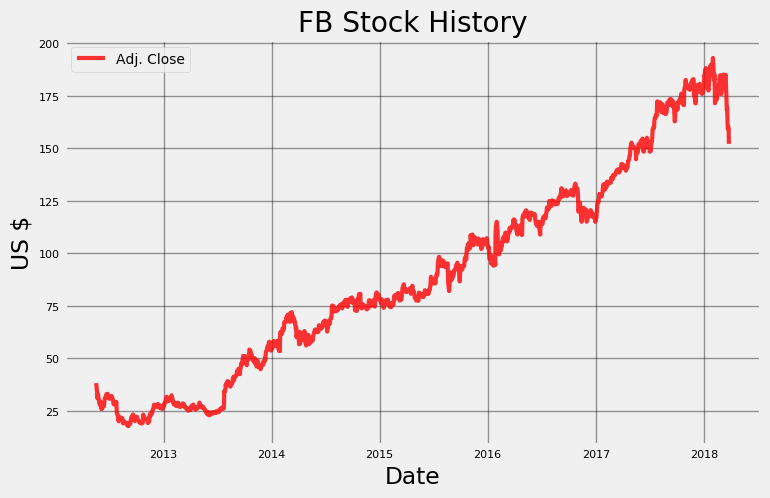

In [7]:
FB.plot_stock()

## Plot of Daily Changes

In [ ]:
# Narrow down dateset to 2018-02-01 to 2018-3-27 to analyze how 
# Facebook-Cambridge Analytica data scandal which was revealed on 
# Mar 17, 2018 affected FB stock price
# We can see it was knocked off around $4/share but was bumped up the
# the very next day

Maximum Daily Change = 6.74 on 2018-02-06 00:00:00.
Minimum Daily Change = -9.46 on 2018-02-08 00:00:00.
Current Daily Change = -4.12 on 2018-03-27 00:00:00.



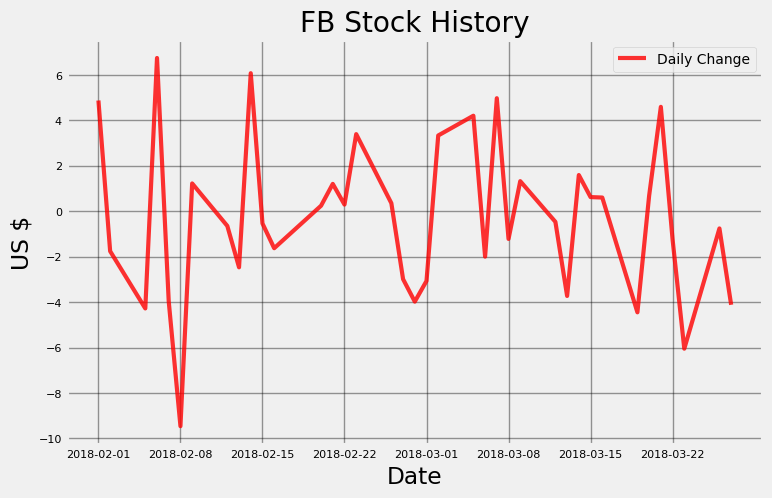

In [9]:
FB.plot_stock(start_date = "2018-02-01", end_date = "2018-03-27", 
              stats=['Daily Change'])

Maximum Daily Change = 6.74 on 2018-02-06 00:00:00.
Minimum Daily Change = -9.46 on 2018-02-08 00:00:00.
Current Daily Change = -4.12 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 128925534.00 on 2018-03-20 00:00:00.
Minimum Adj. Volume = 14873538.00 on 2018-03-12 00:00:00.
Current Adj. Volume = 76787884.00 on 2018-03-27 00:00:00.



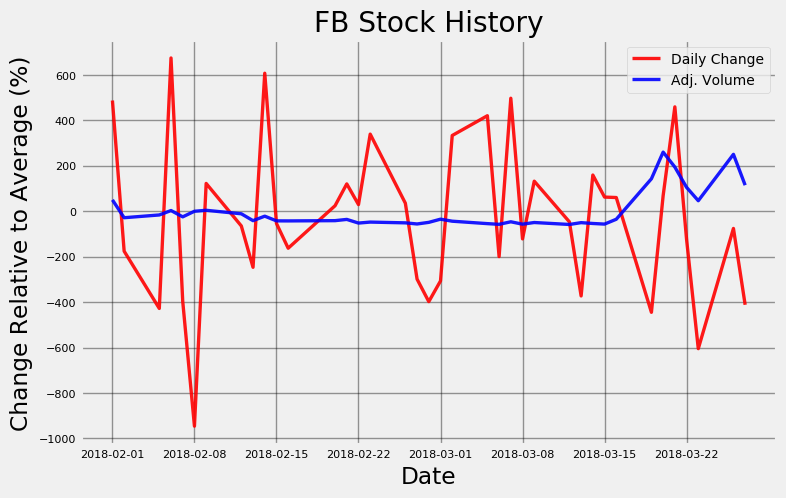

In [10]:
FB.plot_stock(start_date = "2018-02-01", end_date = "2018-03-27", 
              stats=['Daily Change', 'Adj. Volume'], plot_type='pct')

## Examine Trends/Patterns & Forecast

In [11]:
# Green line is predication, light green area is 80% confidence interval
# Black dots are observations
# Mar to Apr failed the market; Prophet is an additive model which perform 
# better at capturing general movements over a long period rather than
# daily fluctuations

Predicted Price on 2018-06-25 00:00:00 = $181.23


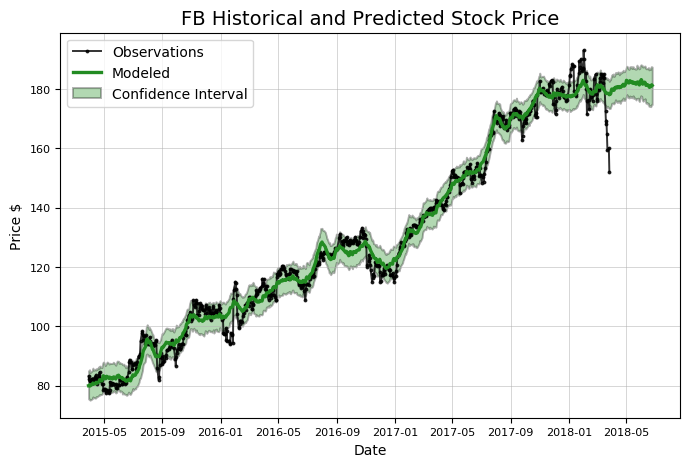

In [12]:
model, model_data = FB.create_prophet_model(days=90)

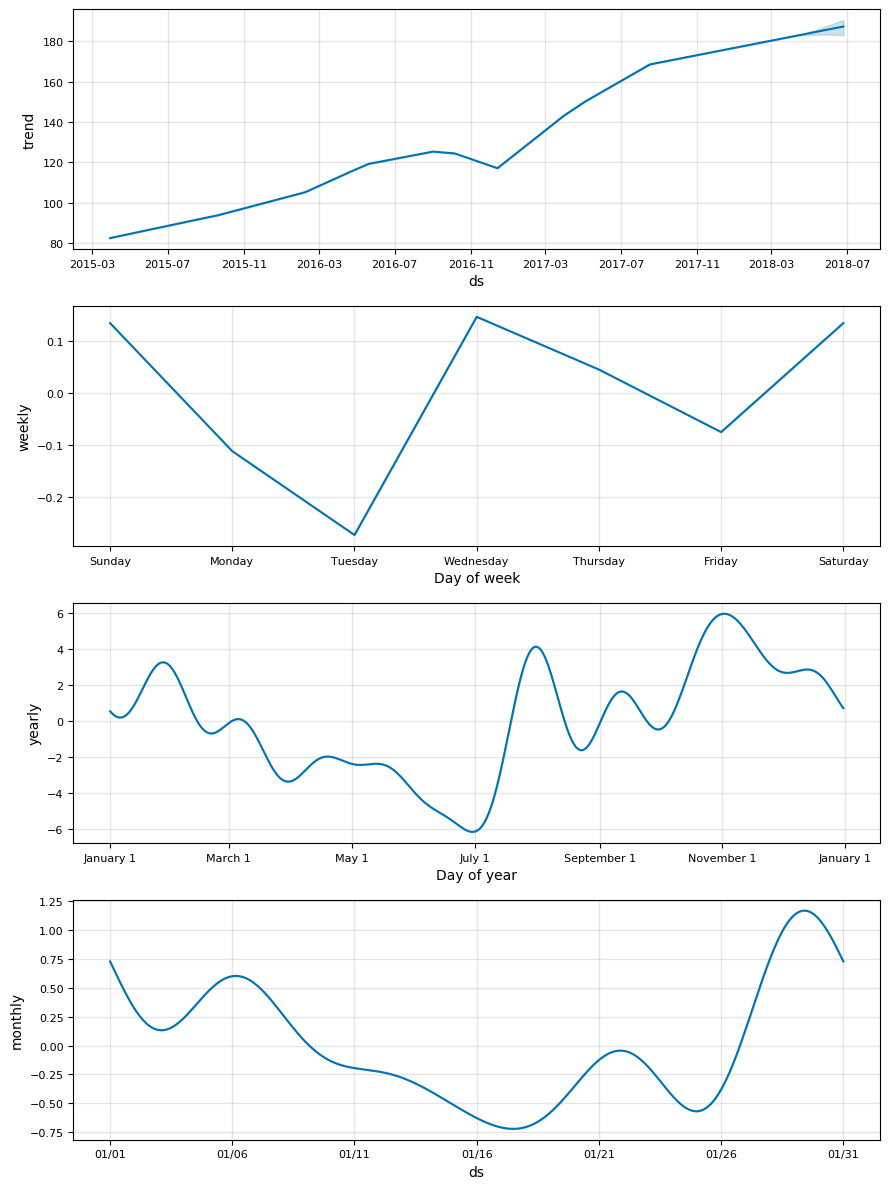

In [13]:
# The monthly pattern appears to be slightly random, and 
# I would not advise you to make investment during 4nd-6th 
# and 26th-29th of the month but buy in late June and early July.
model.plot_components(model_data)
plt.show()

## Test Addition of a Weekly Seasonality
There might be a weekly trends in FB stock price since people often have less momentum to play the market on Friday. I added a weekly seasonality component and plot the trend again.

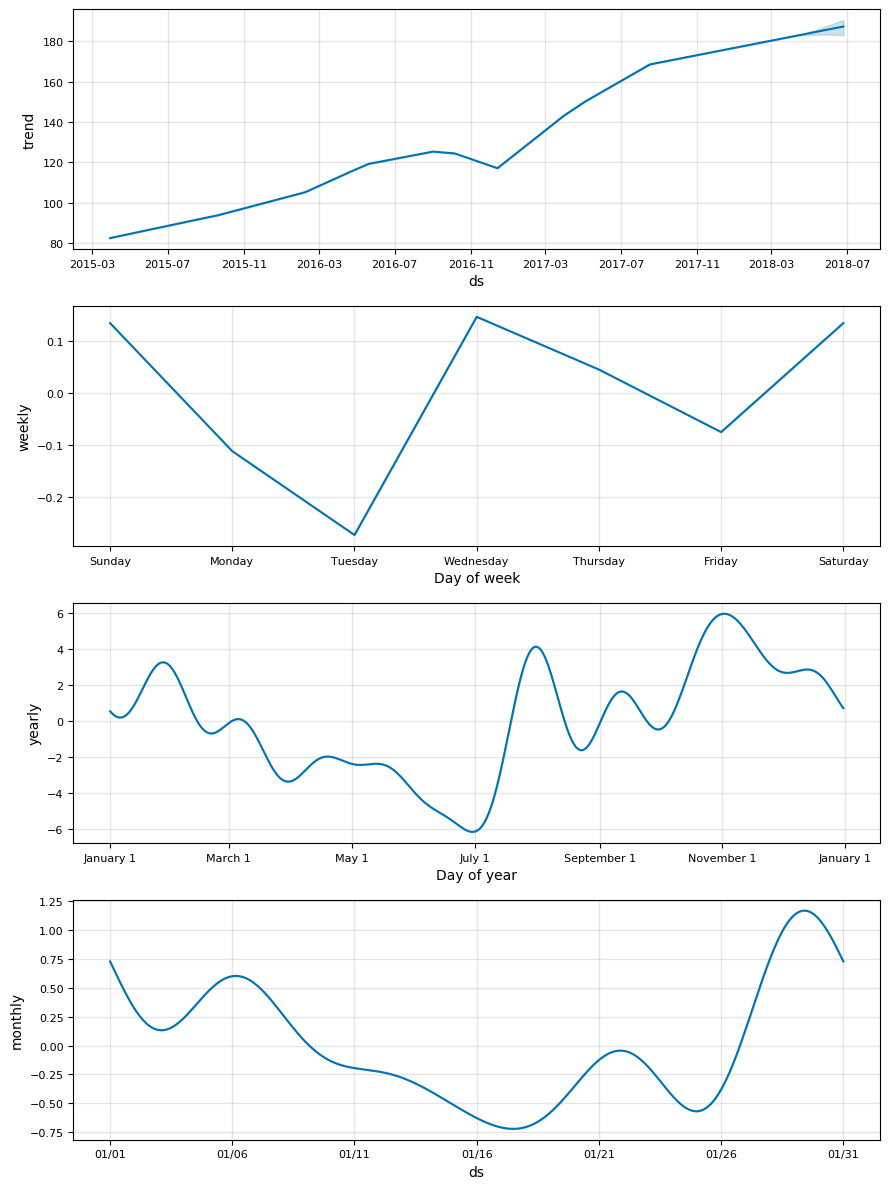

In [14]:
#Buy FB stock on Tuesday or Friday and sell on Wednesday
FB.weekly_seasonality=True
model.plot_components(model_data)
plt.show()

# Bitcoin Price Forecast Using Prophet

In [16]:
def get_quandl_data(quandl_id):
    path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(path)
        print('Cached {} at {}'.format(quandl_id, path))
    return df

In [17]:
# Load bitcoin historical price dataset from Quandl
bit_df = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [18]:
bit_df.head(n=3)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913


In [19]:
bit_df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume (BTC)         float64
Volume (Currency)    float64
Weighted Price       float64
dtype: object

In [20]:
bit_df.isna().any()

Open                 False
High                 False
Low                  False
Close                False
Volume (BTC)         False
Volume (Currency)    False
Weighted Price       False
dtype: bool

In [21]:
bit_df = bit_df.sort_index(ascending=True)
bit = bit_df[['Weighted Price']]
bit['Weighted Price'].describe()

count     1973.000000
mean      2729.844882
std       3447.188387
min          0.000000
25%        402.917501
50%        691.393590
75%       4296.631535
max      19135.469160
Name: Weighted Price, dtype: float64

In [22]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

init_notebook_mode(connected=True)

In [23]:
#https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc
def lineplot(df, title='':
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [24]:
lineplot(bit, title='Bitcoin Close Price')

In [25]:
# Since our dataset is over 5 years, it is hard to get anything meaningful from this line 
# graph. To reduce the noise, I resampled the dataset to weekly bins.
weekly_df = bit.resample('W').apply(sum)

In [26]:
lineplot(weekly_df, title='Bitcoin Close Price (weekly)')

In [27]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [28]:
bit = bit.reset_index()
bit.columns = ['ds', 'y']

In [29]:
prediction_size = 30
train = bit[:-prediction_size]
train.tail(n=3)

,ds,y
1940,2019-05-01,5309.527703
1941,2019-05-02,5373.034059
1942,2019-05-03,5641.844757


In [31]:
pro = Prophet()
pro.fit(train)

In [32]:
future = pro.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

,ds
1970,2019-05-31
1971,2019-06-01
1972,2019-06-02


In [33]:
forecast = pro.predict(future)
forecast.head(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-07,705.266567,74.124900,2365.481927,705.266567,705.266567,492.109152,492.109152,492.109152,8.989976,8.989976,8.989976,483.119175,483.119175,483.119175,0.0,0.0,0.0,1197.375719
1,2014-01-08,704.188056,-85.458187,2315.978174,704.188056,704.188056,459.726795,459.726795,459.726795,0.870909,0.870909,0.870909,458.855887,458.855887,458.855887,0.0,0.0,0.0,1163.914851
2,2014-01-09,703.109545,71.969225,2208.194528,703.109545,703.109545,432.048688,432.048688,432.048688,-2.718497,-2.718497,-2.718497,434.767186,434.767186,434.767186,0.0,0.0,0.0,1135.158233


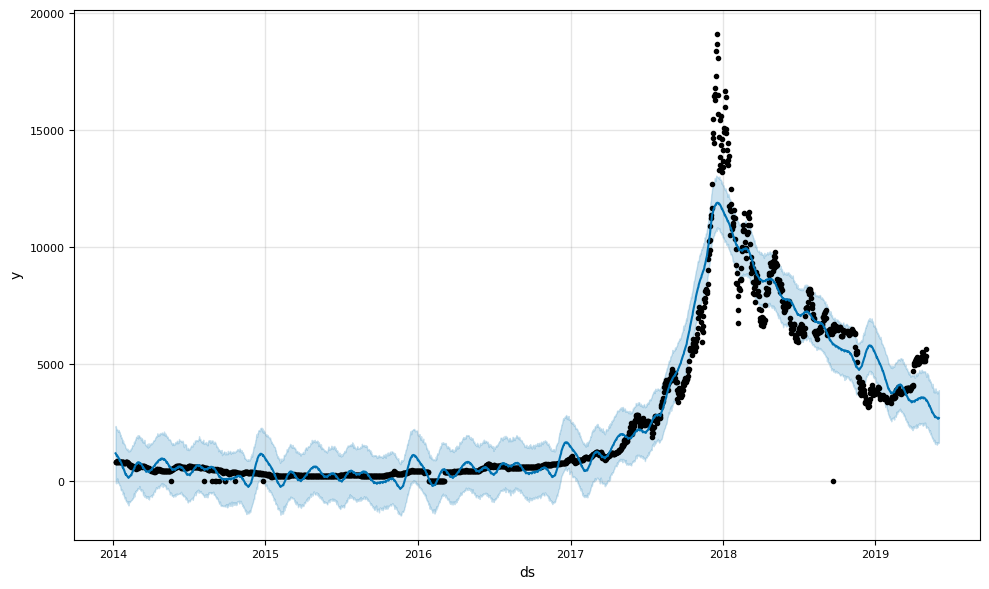

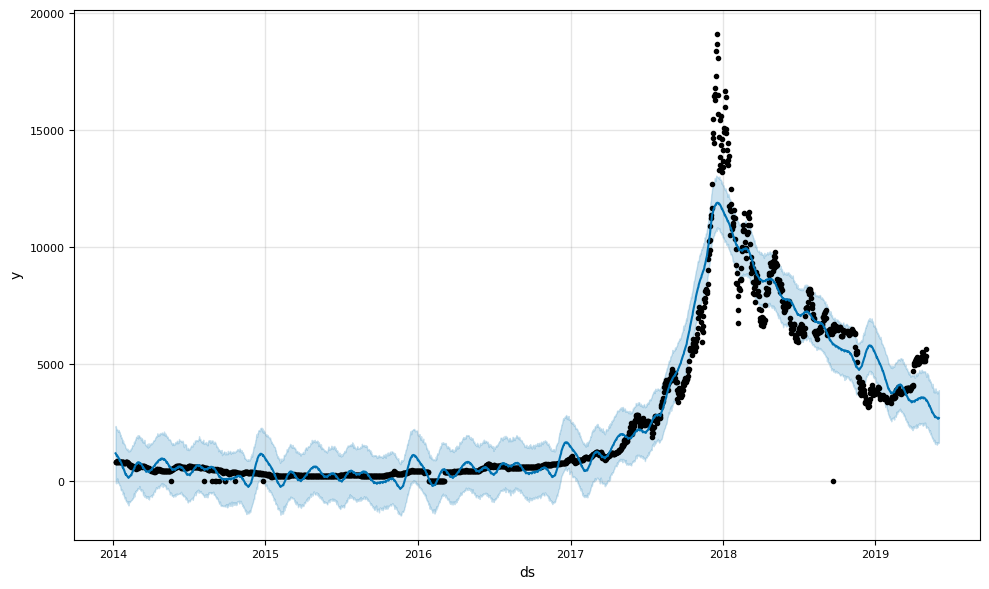

In [34]:
# This graph is not informative and the only definitive conclusion that
# we can draw here is that the model treated many of the data points 
# as outliers as bitcoin price was ridiculous high all of sudden 
# around early 2018.
pro.plot(forecast)

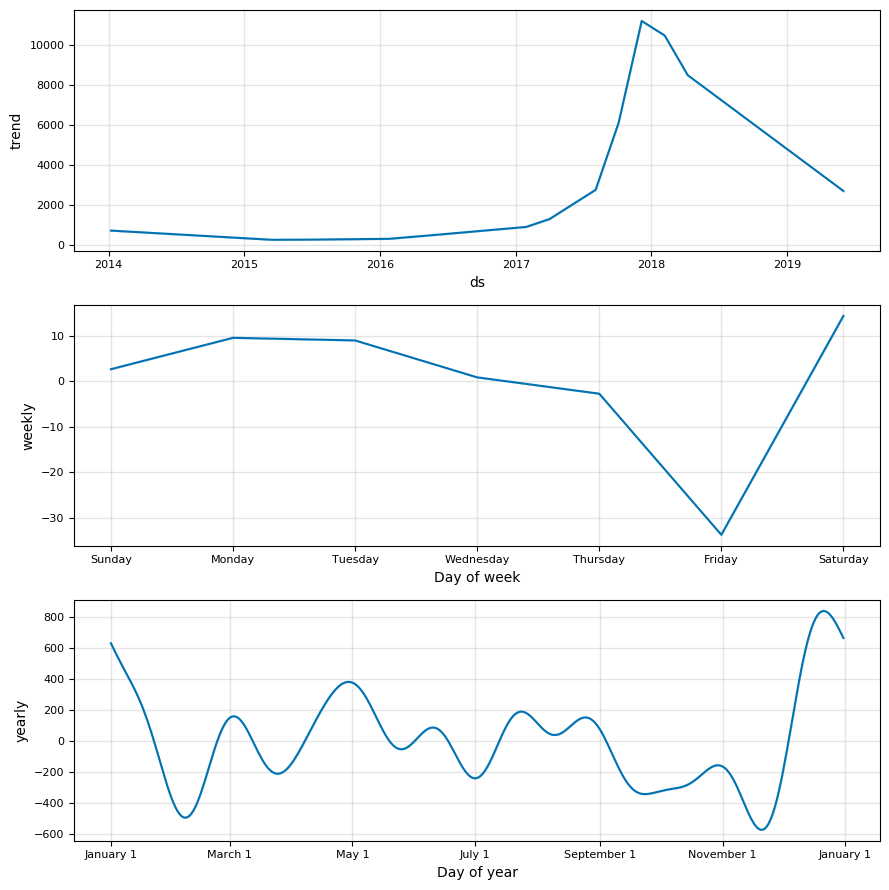

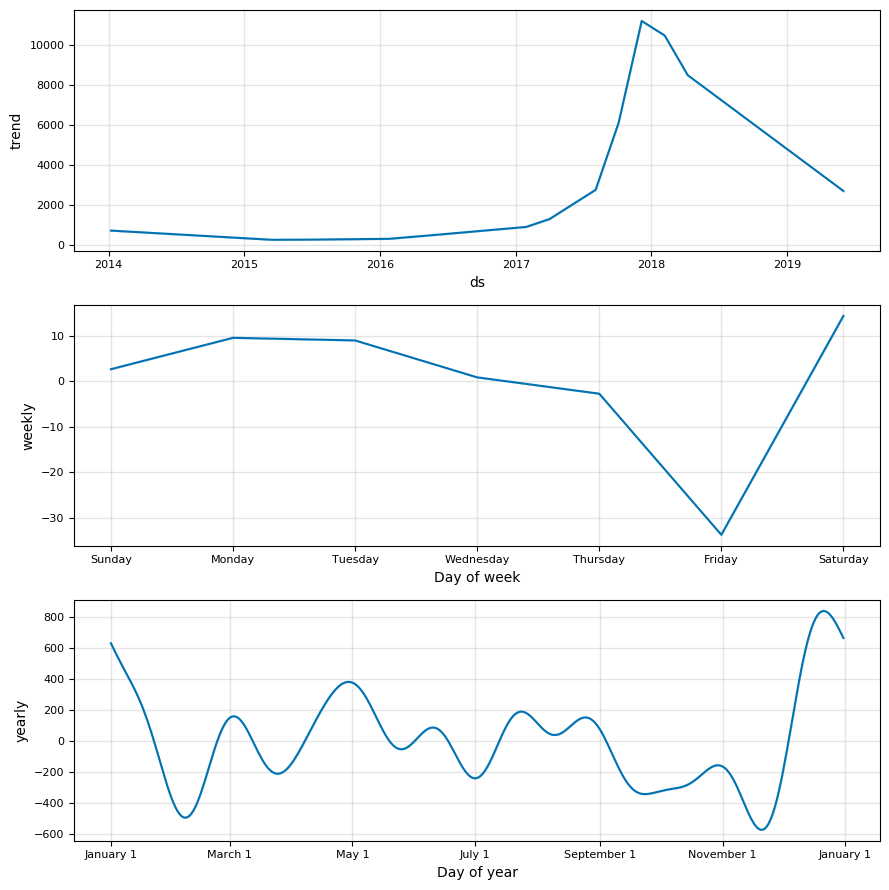

In [35]:
#Friday in February and April.
pro.plot_components(forecast)

# Analyze Relationship between Facebook Stock Price and Bitcoin Price

In [37]:
bit_df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [38]:
# Calculate % Difference for both dataset and inner join two datasets
# per dates

bit2 = bit_df[['Weighted Price']]
bit2['Prior Price'] = bit2['Weighted Price'].shift(1)
bit2['Bitcoin Diff Pct'] = ((bit2['Weighted Price'] - bit2['Prior Price'])/bit2['Prior Price'])
bit2.tail()

,Weighted Price,Prior Price,Bitcoin Diff Pct
Date,,,
2019-05-29,8625.220359,8668.153528,-0.004953
2019-05-30,8541.545609,8625.220359,-0.009701
2019-05-31,8331.197122,8541.545609,-0.024627
2019-06-01,8540.000449,8331.197122,0.025063
2019-06-02,8695.634771,8540.000449,0.018224


In [44]:
FB2 = FB_history
FB2.index = FB_history['Date']
FB2 = FB2[['Adj. Close']]
FB2['Prior Price'] = FB2['Adj. Close'].shift(1)
FB2['FB Diff Pct'] = ((FB2['Adj. Close'] - FB2['Prior Price'])/FB2['Prior Price'])
FB2.head()

,Adj. Close,Prior Price,FB Diff Pct
Date,,,
2012-05-18,38.2318,NaN,NaN
2012-05-21,34.0300,38.2318,-0.109903
2012-05-22,31.0000,34.0300,-0.089039
2012-05-23,32.0000,31.0000,0.032258
2012-05-24,33.0300,32.0000,0.032188


In [45]:
merge = bit2.merge(FB2,left_index=True, right_index=True)
merge = merge[['Bitcoin Diff Pct','FB Diff Pct']]
merge.isna().any()

Bitcoin Diff Pct     True
FB Diff Pct         False
dtype: bool

In [41]:
np.count_nonzero(merge.isnull()) 

0

In [42]:
merge = merge.dropna(subset=['Bitcoin Diff Pct'])
merge.isna().any()

Bitcoin Diff Pct    False
FB Diff Pct         False
dtype: bool

In [567]:
merge.count()

Bitcoin Diff Pct    1035
FB Diff Pct         1035
dtype: int64

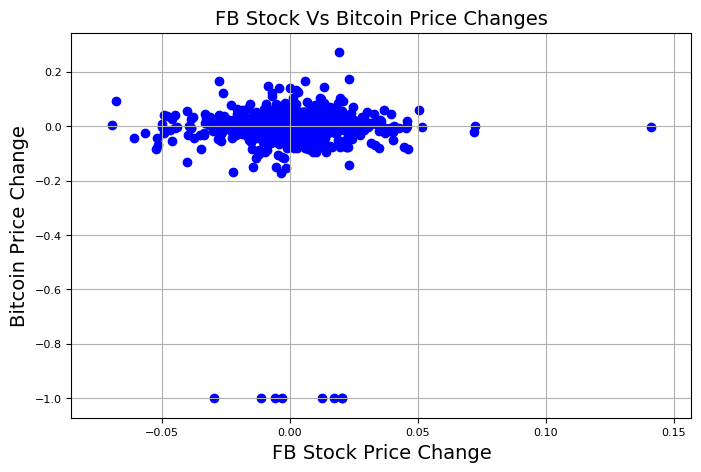

In [573]:
axes = plt.gca()
plt.scatter(merge['FB Diff Pct'], merge['Bitcoin Diff Pct'], color='blue')
plt.title('FB Stock Vs Bitcoin Price Changes', fontsize=14)
plt.xlabel('FB Stock Price Change', fontsize=14)
plt.ylabel('Bitcoin Price Change', fontsize=14)
plt.plot(np.unique(merge['FB Diff Pct']), np.poly1d(np.polyfit(merge['FB Diff Pct'], merge['Bitcoin Diff Pct'], 1))
         (np.unique(merge['FB Diff Pct'])))
plt.grid(True)
plt.show()

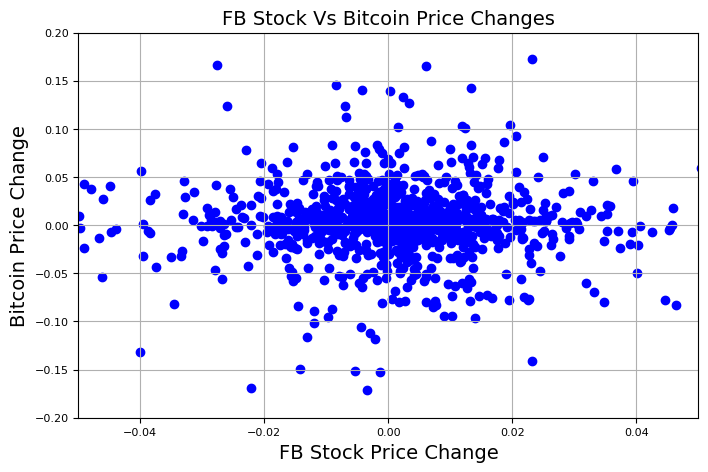

In [574]:
# Remove outliners
axes = plt.gca()
axes.set_xlim([-0.05,0.05])
axes.set_ylim([-0.2,0.2])
plt.scatter(merge['FB Diff Pct'], merge['Bitcoin Diff Pct'], color='blue')
plt.title('FB Stock Vs Bitcoin Price Changes', fontsize=14)
plt.xlabel('FB Stock Price Change', fontsize=14)
plt.ylabel('Bitcoin Price Change', fontsize=14)
plt.plot(np.unique(merge['FB Diff Pct']), np.poly1d(np.polyfit(merge['FB Diff Pct'], merge['Bitcoin Diff Pct'], 1))(np.unique(merge['FB Diff Pct'])))
plt.grid(True)
plt.show()

In [ ]:
# We can see from the scatter plot that there is no significant relationship
# between FB stock price changes and Bitcoin Price Changes

# Disclaimer

This project and the information contained herein is not intended to be a source of advice or credit analysis with respect to the material presented, and the information and/or documents contained in this jupyter notebook do not constitute investment advice.

![QA](./QA.jpg)

![Thanku](./tu.jpg)